# Install Dependencies and Setup

In [111]:
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [113]:
tf.config.list_physical_devices('GPU')

[]

# Remove dodgy images

In [114]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [115]:
data_dir = 'D:\Final_data'

In [116]:
os.listdir(os.path.join(data_dir, 'GreenParking'))

['0000_00532_b.jpg',
 '0000_02187_b.jpg',
 '0000_05696_b.jpg',
 '0000_06886_b.jpg',
 '0000_08244_b.jpg',
 '0001_05318_b.jpg',
 '0002_02183_b.jpg',
 '0002_02554_b.jpg',
 '0003_02063_b.jpg',
 '0003_07398_b.jpg',
 '0004_06801_b.jpg',
 '0005_00490_b.jpg',
 '0005_00512_b.jpg',
 '0005_02171_b.jpg',
 '0006_05286_b.jpg',
 '0006_06035_b.jpg',
 '0006_06797_b.jpg',
 '0007_02188_b.jpg',
 '0007_05159_b.jpg',
 '0009_00490_b.jpg',
 '0009_02194_b.jpg',
 '0009_05325_b.jpg',
 '0010_00004_b.jpg',
 '0010_02063_b.jpg',
 '0011_00515_b.jpg',
 '0012_04539_b.jpg',
 '0013_05647_b.jpg',
 '0014_02176_b.jpg',
 '0017_00195_b.jpg',
 '0018_07248_b.jpg',
 '0019_01137_b.jpg',
 '0019_02163_b.jpg',
 '0019_06895_b.jpg',
 '0020_00536_b.jpg',
 '0020_02063_b.jpg',
 '0020_07156_b.jpg',
 '0021_06361_b.jpg',
 '0022_01753_b.jpg',
 '0023_05798_b.jpg',
 '0025_00457_b.jpg',
 '0027_06458_b.jpg',
 '0028_00196_b.jpg',
 '0028_07031_b.jpg',
 '0028_08102_b.jpg',
 '0031_07285_b.jpg',
 '0036_00507_b.jpg',
 '0038_01762_b.jpg',
 '0038_08198_

In [117]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [118]:
for image_class in os.listdir(data_dir):
    print(image_class)

ForeignAndVN_car_license_plate
GreenParking


In [119]:
img = cv2.imread('D:\\Final_data\\GreenParking\\0000_00532_b.jpg')
img.shape

(303, 472, 3)

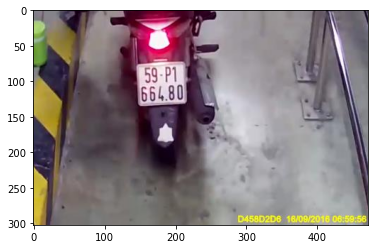

In [120]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [121]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [122]:
import numpy as np
from matplotlib import pyplot as plt

In [123]:
data = tf.keras.utils.image_dataset_from_directory('D:\Final_data')

Found 3029 files belonging to 2 classes.


In [124]:
data_iterator = data.as_numpy_iterator()

In [125]:
batch = data_iterator.next()

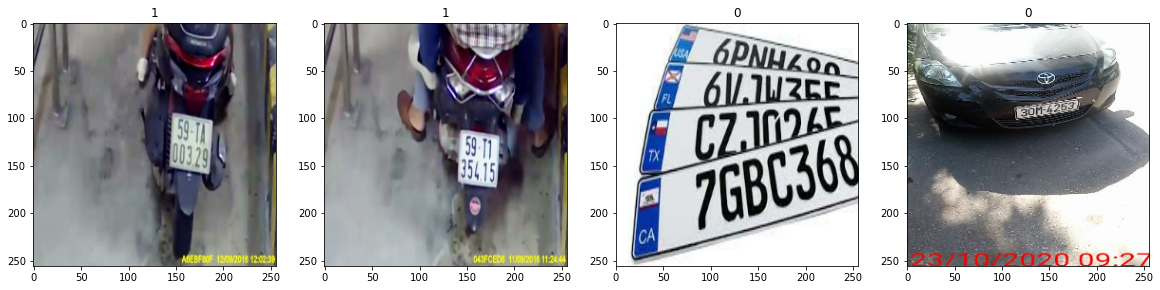

In [126]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [127]:
data = data.map(lambda x,y: (x/255, y))

In [128]:
data.as_numpy_iterator().next()

(array([[[[0.5172871 , 0.5290518 , 0.5643459 ],
          [0.5172871 , 0.5290518 , 0.5643459 ],
          [0.5172871 , 0.5290518 , 0.5643459 ],
          ...,
          [0.03458599, 0.02325021, 0.08863011],
          [0.12015489, 0.10551028, 0.19362302],
          [0.2722076 , 0.2565213 , 0.36209992]],
 
         [[0.5137255 , 0.5254902 , 0.56078434],
          [0.5137255 , 0.5254902 , 0.56078434],
          [0.5137255 , 0.5254902 , 0.56078434],
          ...,
          [0.02876   , 0.01742422, 0.08280412],
          [0.08613174, 0.07148713, 0.15902615],
          [0.18471332, 0.16902705, 0.27160057]],
 
         [[0.5119256 , 0.5236903 , 0.5589844 ],
          [0.5119256 , 0.5236903 , 0.5589844 ],
          [0.5119256 , 0.5236903 , 0.5589844 ],
          ...,
          [0.03623191, 0.02489612, 0.09027603],
          [0.06754868, 0.05290408, 0.1389335 ],
          [0.13195765, 0.11627138, 0.2188449 ]],
 
         ...,
 
         [[0.65074545, 0.6110626 , 0.3569823 ],
          [0.80997

# Split Data

In [129]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [130]:
train_size

66

In [131]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [132]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [134]:
model = Sequential()

In [135]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [137]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# Train

In [138]:
logdir='logs'

In [139]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [140]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
66/66 [==============================] - 148s 2s/step - loss: 0.1533 - accuracy: 0.9356 - val_loss: 0.0303 - val_accuracy: 0.9901
Epoch 2/20
66/66 [==============================] - 141s 2s/step - loss: 0.0224 - accuracy: 0.9953 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/20
66/66 [==============================] - 132s 2s/step - loss: 0.0069 - accuracy: 0.9991 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 4/20
66/66 [==============================] - 139s 2s/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 5/20
66/66 [==============================] - 155s 2s/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 3.1814e-04 - val_accuracy: 1.0000
Epoch 6/20
66/66 [==============================] - 133s 2s/step - loss: 9.8362e-05 - accuracy: 1.0000 - val_loss: 1.8121e-04 - val_accuracy: 1.0000
Epoch 7/20
66/66 [==============================] - ETA: 0s - loss: 4.7758e-04 - accuracy: 0.9995

# Plot Performance

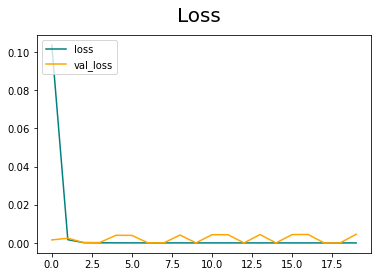

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

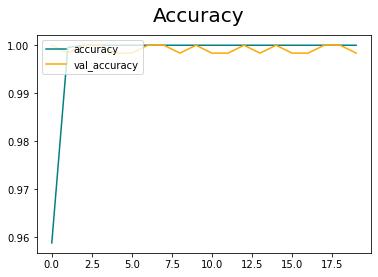

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 233ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.57746476, shape=(), dtype=float32) tf.Tensor(0.9939394, shape=(), dtype=float32) tf.Tensor(0.5798611, shape=(), dtype=float32)


# Test

In [ ]:
import cv2

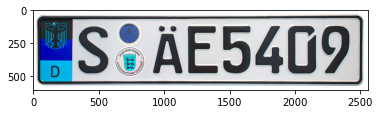

In [ ]:
img = cv2.imread('D:\\Final_data\\ForeignAndVN_car_license_plate\\71ZfpErxy-L.jpg')
plt.imshow(img)
plt.show()

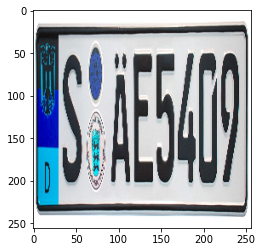

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


In [ ]:
yhat

array([[0.555197]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Là biển số xe máy Việt Nam')
else:
    print(f'Không phải là biển số xe máy Việt Nam')

Là biển số xe máy Việt Nam


# Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 172ms/step


array([[0.9949587]], dtype=float32)